QUESTION 1

In [5]:
# load the data

import pandas as pd 

data = pd.read_csv("cancer.csv")

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [6]:
#To determine the central tendency we get the statistics 

data.describe()


,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<IPython.core.display.Javascript object>


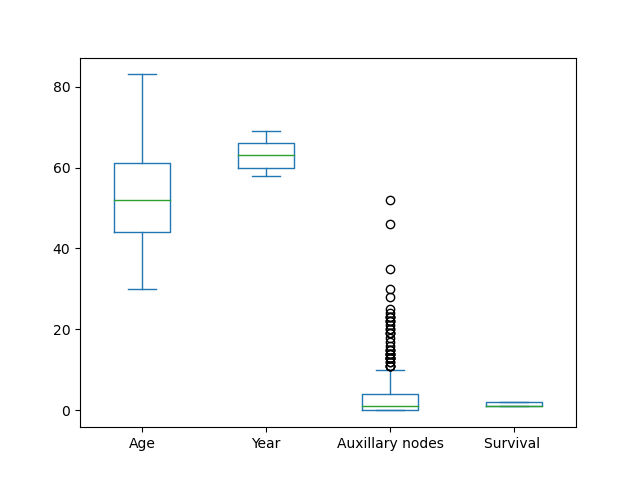

<AxesSubplot:>

In [7]:
# box plot 

%matplotlib notebook

data.plot.box()

<IPython.core.display.Javascript object>


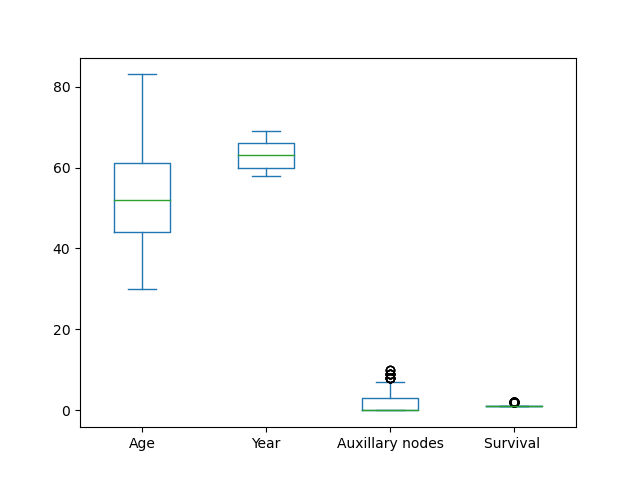

<AxesSubplot:>

In [8]:
# removing outliers 

# max = 75% + 1.5* (75% - 25%)

maximum = 4 + 1.5* (4 - 0)

new_data = data[data["Auxillary nodes"]<= maximum]

new_data.plot.box()

In [9]:
# Correlation 

corr = new_data.corr()

corr

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


<AxesSubplot:>

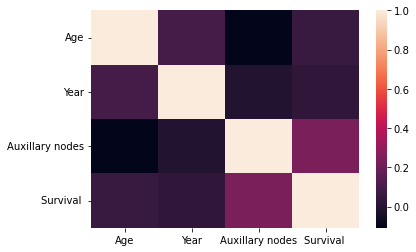

In [10]:
# visualize correlation 

%matplotlib inline 

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

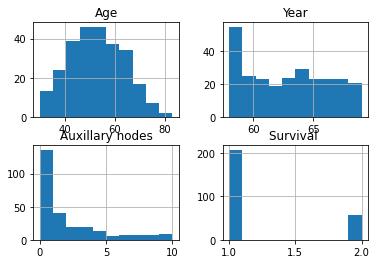

In [11]:
# Skewness

new_data.hist()


In [12]:
# Standardization and Normalization - Scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(new_data)
scaled = scaler.fit_transform(new_data)
scaled_data = pd.DataFrame(scaled, columns = new_data.columns)

scaled_data

,Age,Year,Auxillary nodes,Survival
0,0.000000,0.363636,0.3,0.0
1,0.000000,0.636364,0.0,0.0
2,0.018868,0.090909,0.2,0.0
3,0.018868,0.636364,0.4,0.0
4,0.056604,0.000000,1.0,0.0
...,...,...,...,...
260,0.849057,0.363636,0.1,0.0
261,0.867925,0.818182,0.0,0.0
262,0.886792,0.636364,0.3,0.0
263,0.905660,0.636364,0.1,1.0


In [13]:
new_data.to_csv("newdata.csv")

In [14]:
scaled_data.to_csv("scaleddata.csv")

QUESTION 2

In [15]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - Machine Learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
# Import data 

data = pd.read_csv("newdata.csv")

# create features / inputs
x = data.drop(columns = ["Survival "])

# create the output / class
y = data["Survival "]

# spilling into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.6)

data

,Unnamed: 0,Age,Year,Auxillary nodes,Survival
0,0,30,62,3,1
1,1,30,65,0,1
2,2,31,59,2,1
3,3,31,65,4,1
4,4,33,58,10,1
...,...,...,...,...,...
260,300,75,62,1,1
261,301,76,67,0,1
262,302,77,65,3,1
263,303,78,65,1,2


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



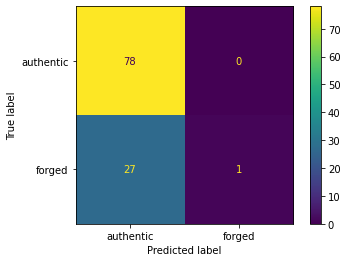

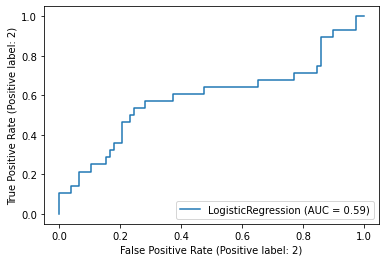

In [17]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "liblinear", penalty = "l2", C = 1.0, random_state = 10).fit(x_train, y_train)

# Evaluating the model
clf.score(x_test, y_test)

# Making predictions
y_pred = clf.predict(x_test)

# Creating the labels
labels = ["authentic", "forged"]
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
print(classification_report(y_test, y_pred, labels = clf.classes_))
plot_roc_curve(clf, x_test, y_test)
plt.show()

RANDOM FOREST

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



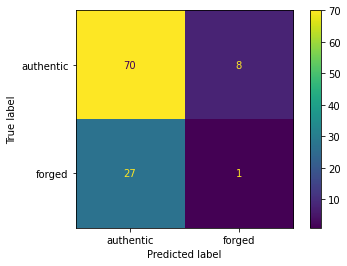

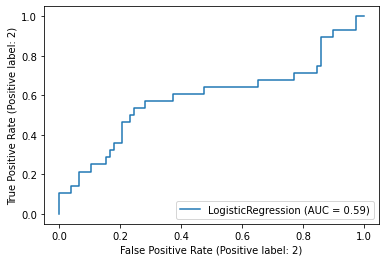

In [18]:
# Developing and fitting the random forest algorithm

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'log2',random_state = 0).fit(x_train, y_train)

# Making predictions
rf_pred = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()

print(classification_report(y_test, y_pred, labels = clf.classes_))

plot_roc_curve(clf, x_test, y_test)
plt.show()


SUPPORT VECTOR MACHINE

C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       0.00      0.00      0.00        28

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



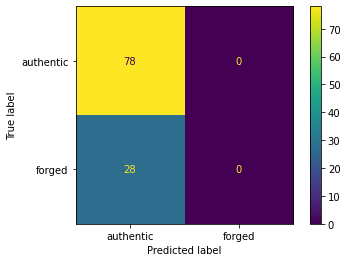

In [19]:
svm = SVC(random_state = 0, kernel = "linear", gamma = 1). fit(x_train, y_train)
svm_pred = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()

print(classification_report(y_test, svm_pred, labels = clf.classes_))


NEURAL NETWORK

C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



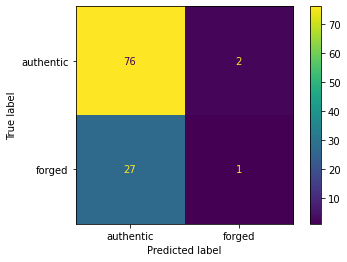

In [20]:
# Developing and fitting the NeuraL Network
nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(x_train, y_train)
nn_pred = nn.predict(x_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()

print(classification_report(y_test, y_pred, labels = clf.classes_))


# implimentation of KFold cross validation

In [21]:
# Logistic Regression

# implementation of k-fold cross validation

# specify the number of splits - 10

kf = KFold(n_splits = 10)

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + "is" + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1is0.9375
Accuracy for iteration 2is0.75
Accuracy for iteration 3is0.8125
Accuracy for iteration 4is0.75
Accuracy for iteration 5is0.75
Accuracy for iteration 6is0.8125
Accuracy for iteration 7is0.75
Accuracy for iteration 8is1.0
Accuracy for iteration 9is0.75
Accuracy for iteration 10is0.7333333333333333


In [22]:
# Random Forest

# implementation of k-fold cross validation

# specify the number of splits - 10

kf = KFold(n_splits = 10)

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    rf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + "is" + str(rf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1is0.875
Accuracy for iteration 2is0.75
Accuracy for iteration 3is0.8125
Accuracy for iteration 4is0.75
Accuracy for iteration 5is0.6875
Accuracy for iteration 6is0.8125
Accuracy for iteration 7is0.625
Accuracy for iteration 8is1.0
Accuracy for iteration 9is0.8125
Accuracy for iteration 10is0.8


In [23]:
# Vector Machine

# implementation of k-fold cross validation

# specify the number of splits - 10

kf = KFold(n_splits = 10)

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    svm.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + "is" + str(svm.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1is0.9375
Accuracy for iteration 2is0.75
Accuracy for iteration 3is0.8125
Accuracy for iteration 4is0.75
Accuracy for iteration 5is0.8125
Accuracy for iteration 6is0.8125
Accuracy for iteration 7is0.8125
Accuracy for iteration 8is1.0
Accuracy for iteration 9is0.6875
Accuracy for iteration 10is0.7333333333333333


In [24]:
# Neural Network

# implementation of k-fold cross validation

# specify the number of splits - 10

kf = KFold(n_splits = 10)

iteration = 1
for train_indices, test_indices in kf.split(x_train):
    nn.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + "is" + str(nn.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1is0.9375
Accuracy for iteration 2is0.8125
Accuracy for iteration 3is0.8125


C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy for iteration 4is0.8125
Accuracy for iteration 5is0.8125
Accuracy for iteration 6is0.75


C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy for iteration 7is0.75


C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy for iteration 8is1.0
Accuracy for iteration 9is0.6875
Accuracy for iteration 10is0.7333333333333333


C:\Users\sadiqolubunmi\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# After comparing all 4 methods, I identify that Logistic Regression is the best for the data set

# GridSearchCV

In [ ]:
# Implement grid search for parameter tuning

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(x_train, y_train)
svm_grid.best_params_

# Develop a function which can implement machine learning

In [25]:
def machine_learning (data, SVC):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    
    from sklearn.model_selection import train_test_split, KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import roc_auc_score, plot_roc_curve
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    
    data = pd.read_csv ("newdata.csv")
    
    x = data.drop(columns = ["Survival "])
    y = data["Survival "]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = 0.6)

    data
    print (" Model is being created")
    
    clf = LogisticRegression(solver = "liblinear", penalty = "l2", C = 1.0, random_state = 10).fit(x_train, y_train)


    clf.score(x_test, y_test)


    y_pred = clf.predict(x_test)
    labels = ["authentic", "forged"]
    cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
    disp.plot()
    print(classification_report(y_test, y_pred, labels = clf.classes_))
    plot_roc_curve(clf, x_test, y_test)
    plt.show()
    
    kf = KFold(n_splits = 10)

    iteration = 1
    for train_indices, test_indices in kf.split(x_train):
        clf.fit(x_train.iloc[train_indices], y_train.iloc[train_indices])
        print("Accuracy for iteration "+ str(iteration) + "is" + str(clf.score(x_train.iloc[test_indices], y_train.iloc[test_indices])))
        iteration += 1
        
    return performance_metrics    

 Model is being created
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        78
           2       1.00      0.04      0.07        28

    accuracy                           0.75       106
   macro avg       0.87      0.52      0.46       106
weighted avg       0.81      0.75      0.65       106



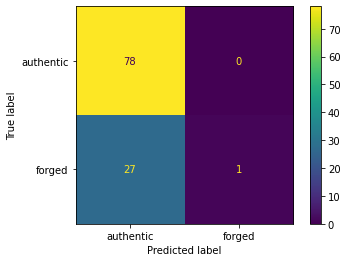

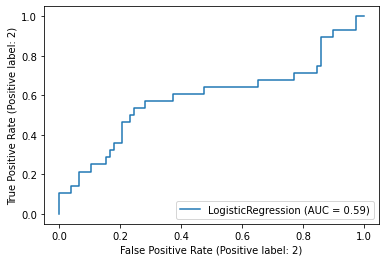

Accuracy for iteration 1is0.9375
Accuracy for iteration 2is0.75
Accuracy for iteration 3is0.8125
Accuracy for iteration 4is0.75
Accuracy for iteration 5is0.75
Accuracy for iteration 6is0.8125
Accuracy for iteration 7is0.75
Accuracy for iteration 8is1.0
Accuracy for iteration 9is0.75
Accuracy for iteration 10is0.7333333333333333


NameError: name 'performance_metrics' is not defined

In [26]:
machine_learning (data, SVC)